## **CNRM Meridional ovErTurning ciRculation diagnostIC (METRIC) Configurations**

#### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/cnrm/20240805/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/esm-piControl/r1i1p2f2/Omon/thetao/gn/thetao_Omon_CNRM-ESM2-1_esm-piControl_r1i1p2f2_gn_191801-194212.nc"

ds_thetao = xr.open_dataset(fpath)
ds_thetao

<xarray.Dataset> Size: 10GB
Dimensions:      (y: 294, x: 362, nvertex: 4, lev: 75, axis_nbounds: 2,
                  time: 300)
Coordinates:
    lat          (y, x) float64 851kB ...
    lon          (y, x) float64 851kB ...
  * lev          (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time         (time) datetime64[ns] 2kB 1918-01-16T12:00:00 ... 1942-12-16...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon   (y, x, nvertex) float64 3MB ...
    bounds_lat   (y, x, nvertex) float64 3MB ...
    lev_bounds   (lev, axis_nbounds) float64 1kB ...
    time_bounds  (time, axis_nbounds) datetime64[ns] 5kB ...
    thetao       (time, lev, y, x) float32 10GB ...
Attributes: (12/53)
    name:                   /scratch/work/seferian/CMIP6/DECK/CNRM-ESM2-1_esm...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2024-04-15T13:25:57Z
    description:            DECK: control (emission-driven)
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / CMI...
    activity_id:            CMIP
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          9a1fa5cac842f55652e42ad1d6b59c62
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/0b6a14b8-e928-414e-8469-eb91257bca02

In [ ]:
i1 = 206
i2 = 280
j1 = 189
j2 = 189

plt.pcolormesh(ds_thetao.longitude, ds_thetao.latitude, ds_thetao.thetao.isel(time=0, lev=0))
plt.plot(ds_thetao.longitude.isel(i=slice(i1, i2), j=j1), ds_thetao.latitude.isel(i=slice(i1, i2), j=j1), color='coral')

plt.xlim([-85+360, 360])
plt.ylim([5, 35])

In [ ]:
fc_minlon = -81.0 + 360
fc_maxlon = -77.5 + 360
wbw_maxlon = -76.1 + 360
int_maxlon = -10 + 360

print(fc_minlon, fc_maxlon, wbw_maxlon, int_maxlon)

In [ ]:
ds_thetao.longitude.isel(i=[i1, i2], j=j1).values

In [ ]:
ds_thetao.latitude.isel(i=slice(i1, i2), j=j1).mean()

### **Define NEMO t/u/v masks**

**Note:** currently there is no available `uo` & `vo` outputs available for CNRM.

In [3]:
# Example T-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/prepub/cnrm/20240805/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/esm-piControl/r1i1p2f2/Omon/thetao/gn/thetao_Omon_CNRM-ESM2-1_esm-piControl_r1i1p2f2_gn_191801-194212.nc"
ds_thetao = xr.open_dataset(fpath)

# Example U-grid file:
# fpath="/g100_store/DRES_OptimESM/ESGF/prepub/smhi/20240622/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-ESM-1/esm-hist/r5i1p1f1/Omon/uo/gn/v20240622/uo_Omon_EC-Earth3-ESM-1_esm-hist_r5i1p1f1_gn_185001-185012.nc"
# ds_uo = xr.open_dataset(fpath)

# Example V-grid file:
# fpath="/g100_store/DRES_OptimESM/ESGF/prepub/smhi/20240622/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-ESM-1/esm-hist/r5i1p1f1/Omon/vo/gn/v20240622/vo_Omon_EC-Earth3-ESM-1_esm-hist_r5i1p1f1_gn_185001-185012.nc"
# ds_vo = xr.open_dataset(fpath)

In [4]:
t_mask = ~np.isnan(ds_thetao["thetao"].isel(time=0))
# u_mask = ~np.isnan(ds_uo["uo"].isel(time=0))
# v_mask = ~np.isnan(ds_vo["vo"].isel(time=0))

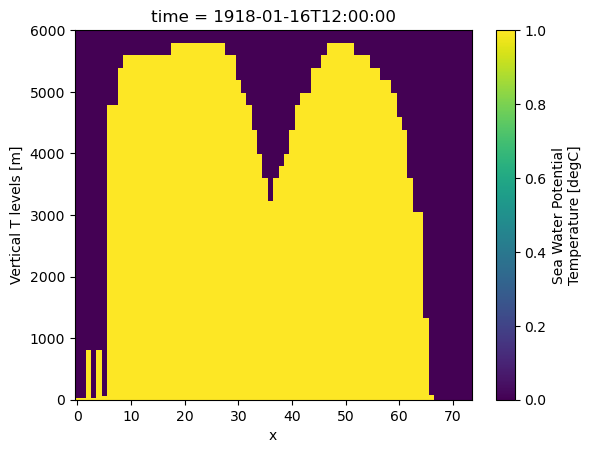

In [6]:
i1 = 206
i2 = 280
j1 = 189
j2 = 189

t_mask.isel(x=slice(i1, i2), y=j1).plot()

In [13]:
# Use EC-Earth T-grid file as template DataSet:

ds_thetao = ds_thetao.drop_vars(ds_thetao.data_vars)
ds_thetao["tmask"] = t_mask
# ds_thetao["umask"] = u_mask
# ds_thetao["vmask"] = v_mask

# Write masks to mesh_mask netCDF file:
out_fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/CNRM/CNRM_Ofx/mesh_mask_Ofx_CNRM.nc"
ds_thetao.rename({'x':'i', 'y':'j', 'lon':'longitude', 'lat':'latitude'}).to_netcdf(out_fpath)

In [14]:
xr.open_dataset(out_fpath)

<xarray.Dataset> Size: 10MB
Dimensions:    (j: 294, i: 362, lev: 75, time: 300)
Coordinates:
    latitude   (j, i) float64 851kB ...
    longitude  (j, i) float64 851kB ...
  * lev        (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time       (time) datetime64[ns] 2kB 1918-01-16T12:00:00 ... 1942-12-16T1...
Dimensions without coordinates: j, i
Data variables:
    tmask      (lev, j, i) bool 8MB ...
Attributes: (12/53)
    name:                   /scratch/work/seferian/CMIP6/DECK/CNRM-ESM2-1_esm...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2024-04-15T13:25:57Z
    description:            DECK: control (emission-driven)
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / CMI...
    activity_id:            CMIP
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          9a1fa5cac842f55652e42ad1d6b59c62
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    tracking_id:            hdl:21.14100/0b6a14b8-e928-414e-8469-eb91257bca02

### **Testing METRIC Outputs**

In [ ]:
fpath="/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/SMHI/EC-Earth3-ESM-1_esm-hist_r5i1p1f1_1850-01-2014-12_natl_meridional_transports_at_26N.nc"

ds_test = xr.open_dataset(fpath)
ds_test

In [ ]:
ds_test.v.mean(dim="time").plot()
plt.ylim([6000, 0])
plt.axvline(x=282.5)

In [ ]:
ds_test.moc_rapid.plot()

In [ ]:
ds_test.moc_rapid.plot()